# Credit Card Fraud Detection

<h1> Introduction</h1>
<p> The dataset is sourced from the kagglehub so instead of a dataset .csv file i have clone the dataset from the kagglehub.
<h2> Contents of this notebook</h2>
<li> dataset insertion
<li> exploring the dataset
<li> handling of imbalanced data
<li> choosing the model
<li> finetuning the model
    

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 66.0M/66.0M [00:04<00:00, 16.2MB/s]

Extracting files...


Path to dataset files: C:\Users\Pyae Hmue Htet\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Pyae Hmue Htet\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

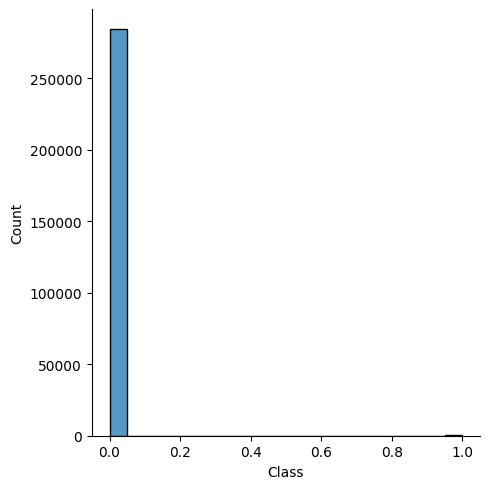

In [5]:
import seaborn as sns
sns.displot(df, x="Class")

In [13]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ------------------------------------- 240.0/240.0 kB 14.4 MB/s eta 0:00:00
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
     ---------------------------------------- 8.9/8.9 MB 27.1 MB/s eta 0:00:00
     ---------------------------------------- 308.4/308.4 kB ? eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Handling imbalanced dataset

There are quite a few ways to dealing with imabalanced dataset. 
<li>Oversampling</li>
<li>Undersampling</li>
<li>Using Sklearn Weight Parameter</li>
Each with their own pros and cons, In this notebook i will be using all three of those and compare their data.

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Oversampling

This is a process in which we overpopulate the smaller amount of data on the class set, in this case it is the fraud(1). We will overpopulate it to match the data size of Legit(0).

<p style = "color:green">There are more than one method to oversmapling as well below is the example i use to oversample which use a imblearn library.

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 284315, 1: 492})
After SMOTE: Counter({0: 284315, 1: 284315})


# Scaling

One of main componenet in our machine learning algorithm. without this even thought the class imbalance has been solved, model can underperformed because of unscaled features.
In short:

* Oversampling = balance classes.

* Scaling = balance feature magnitudes.

Defination:
<br>
Feature scaling is a data preprocessing technique used in machine learning to transform features (independent variables) so they have a similar scale, which is crucial for algorithms sensitive to feature ranges.
<br>

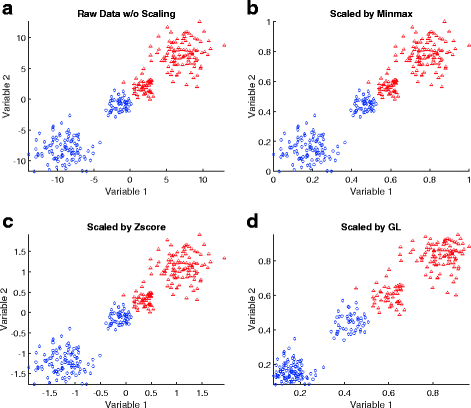!

In [7]:
X_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,...,-0.709398,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751
568626,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,...,-0.263193,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571
568627,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,...,0.468282,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823
568628,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,...,0.197287,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


In [14]:
y_resampled

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

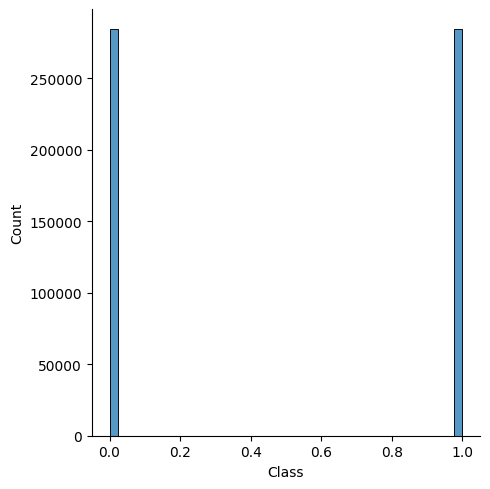

In [15]:
import seaborn as sns
sns.displot(y_resampled)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)


C:\PHH\Workspace\StudioForwardInternal\env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
X_test_scaled = scaler.transform(X)

In [14]:
X_test_scaled 

array([[-1.8249305 ,  0.20447492, -0.54748253, ...,  0.05497586,
        -0.14982747,  0.24549597],
       [-1.8249305 ,  0.67297588, -0.45417255, ..., -0.09485495,
        -0.06419549, -0.42130253],
       [-1.82490971,  0.20474171, -0.89640034, ..., -0.14359591,
        -0.24245216,  1.28492649],
       ...,
       [ 1.76570849,  0.80658744, -0.61038242, ..., -0.08072989,
        -0.16301021, -0.12545693],
       [ 1.76570849,  0.40999747, -0.38140043, ...,  0.02897318,
         0.15075951, -0.38812825],
       [ 1.76579161,  0.35620596, -0.57968016, ..., -0.08795129,
        -0.06676909,  0.55128023]], shape=(284807, 30))

In [11]:
y_pred = model.predict(X)

In [12]:
y_prob = model.predict_proba(X)[:, 1]

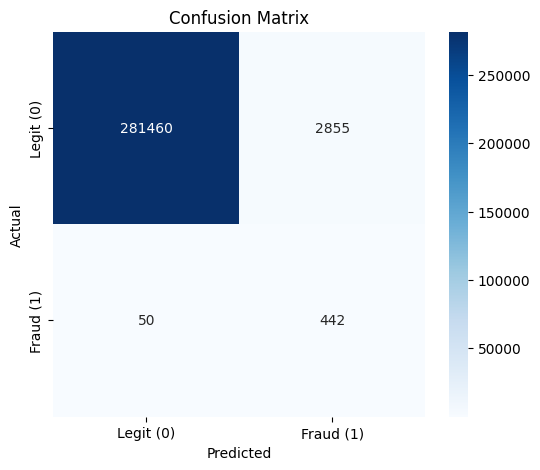

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit (0)", "Fraud (1)"], yticklabels=["Legit (0)", "Fraud (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9900    0.9949    284315
           1     0.1341    0.8984    0.2333       492

    accuracy                         0.9898    284807
   macro avg     0.5669    0.9442    0.6141    284807
weighted avg     0.9983    0.9898    0.9936    284807

ROC-AUC Score: 0.9840543431373852


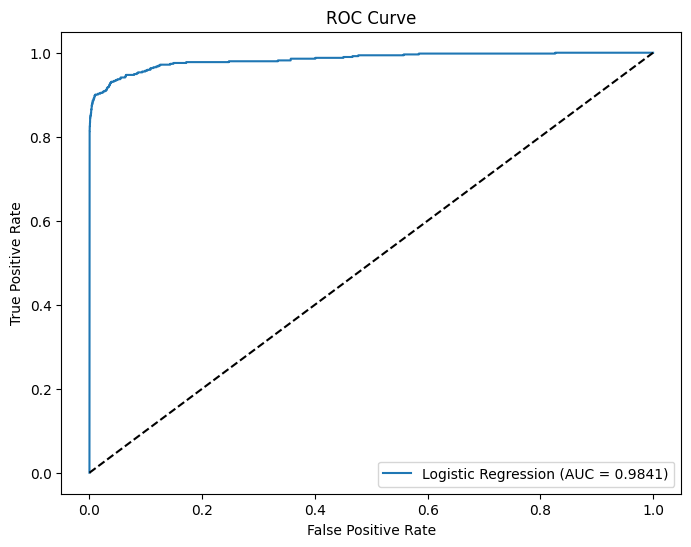

In [14]:
# Classification Report
print("\nClassification Report:\n", classification_report(y, y_pred, digits=4))

# ROC-AUC
roc_auc = roc_auc_score(y, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()